In [147]:
import pandas as pd

# RAw CSV file 
csv_files = ["ACC.CSV", "BVP.CSV", "EDA.CSV", "HR.CSV", "IBI.CSV", "TEMP.CSV"]

# Make a list that is empty to hold DataFrames from each CSV.
dataframes = []

# Read each CSV file into a DataFrame 
for file_name in csv_files:
    data = pd.read_csv(file_name)
    dataframes.append(data)

# Using "concat," merge all DataFrames into a single DataFrame.

merged_data = pd.concat(dataframes, axis=1)

# Create a new CSV file with the combined DataFrame in it.

merged_data.to_csv("merge_data.csv", index=False)

print("Merged data has been saved to 'merge_data.csv'")


Merged data has been saved to 'merge_data.csv'


In [148]:
import os
# Retrieve the desktop directory's path.

desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')

# Obtain the pat# Establish the desktop directory's file path for the combined CSV.

merged_file_path = os.path.join(desktop_path, 'merge_data.csv')

In [149]:
data1 = pd.read_csv("merge_data.csv")

In [150]:
data1

,1644844459.000000,1644844459.000000,1644844459.000000.1,1644844459.00,1644844459.000000.1,1644844469.000000,1644844459.000000.2,IBI,1644844459.000000.3
0,32.0,32.0,32.0,64.00,4.000000,1.00,26.984375,0.687500,4.00
1,-30.0,33.0,46.0,-0.00,0.000000,85.00,27.671875,0.687500,31.91
2,-30.0,33.0,46.0,-0.00,0.164001,71.50,28.328125,0.656250,31.91
3,-30.0,34.0,46.0,-0.00,0.199876,75.33,28.984375,0.656250,31.91
4,-30.0,33.0,46.0,-0.00,0.199876,71.50,29.843750,0.859375,31.91
...,...,...,...,...,...,...,...,...,...
194410,NaN,NaN,NaN,-115.03,NaN,NaN,NaN,NaN,NaN
194411,NaN,NaN,NaN,-129.06,NaN,NaN,NaN,NaN,NaN
194412,NaN,NaN,NaN,-144.23,NaN,NaN,NaN,NaN,NaN
194413,NaN,NaN,NaN,-155.62,NaN,NaN,NaN,NaN,NaN


# Clean and Preprocess the Dataset

In [151]:
# Rename the columns to make them easier to read.

column_names = ["signal1", "signal2", "signal3", "signal4", "signal5",
                "signal6", "signal7", "Signal", "IBI"]
data1.columns = column_names

# Drop duplicates 
data1.drop_duplicates(inplace=True)
# Change the format of timestamps to datetime

data1["signal1"] = pd.to_datetime(data1["signal1"], unit="s")

# Show the DataFrame's cleaned-up initial few rows.

print(data1.head())

              signal1  signal2  signal3  signal4   signal5  signal6  \
0 1970-01-01 00:00:32     32.0     32.0     64.0  4.000000     1.00   
1 1969-12-31 23:59:30     33.0     46.0     -0.0  0.000000    85.00   
2 1969-12-31 23:59:30     33.0     46.0     -0.0  0.164001    71.50   
3 1969-12-31 23:59:30     34.0     46.0     -0.0  0.199876    75.33   
4 1969-12-31 23:59:30     33.0     46.0     -0.0  0.199876    71.50   

     signal7    Signal    IBI  
0  26.984375  0.687500   4.00  
1  27.671875  0.687500  31.91  
2  28.328125  0.656250  31.91  
3  28.984375  0.656250  31.91  
4  29.843750  0.859375  31.91  


In [152]:
data1.head()

,signal1,signal2,signal3,signal4,signal5,signal6,signal7,Signal,IBI
0,1970-01-01 00:00:32,32.0,32.0,64.0,4.000000,1.00,26.984375,0.687500,4.00
1,1969-12-31 23:59:30,33.0,46.0,-0.0,0.000000,85.00,27.671875,0.687500,31.91
2,1969-12-31 23:59:30,33.0,46.0,-0.0,0.164001,71.50,28.328125,0.656250,31.91
3,1969-12-31 23:59:30,34.0,46.0,-0.0,0.199876,75.33,28.984375,0.656250,31.91
4,1969-12-31 23:59:30,33.0,46.0,-0.0,0.199876,71.50,29.843750,0.859375,31.91


In [153]:
data1.describe()

,signal2,signal3,signal4,signal5,signal6,signal7,Signal,IBI
count,93762.000000,93762.000000,109814.000000,12156.000000,3029.000000,1140.000000,1140.000000,12152.000000
mean,6.329206,48.535110,-0.497125,1.984681,88.368121,1462.060225,0.715817,32.214326
std,17.351740,8.594953,66.677078,2.668508,16.401185,953.826986,0.094345,0.733011
min,-55.000000,-21.000000,-1100.470000,0.000000,1.000000,26.984375,0.500000,4.000000
25%,-5.000000,42.000000,-18.290000,0.403862,78.330000,556.308594,0.656250,31.610000
50%,-2.000000,45.000000,1.400000,0.681894,85.350000,1484.367188,0.703125,32.450000
75%,27.000000,57.000000,19.987500,2.263759,92.900000,2266.492188,0.769531,32.810000
max,115.000000,127.000000,1168.720000,11.005073,146.780000,3012.687500,1.234375,33.090000


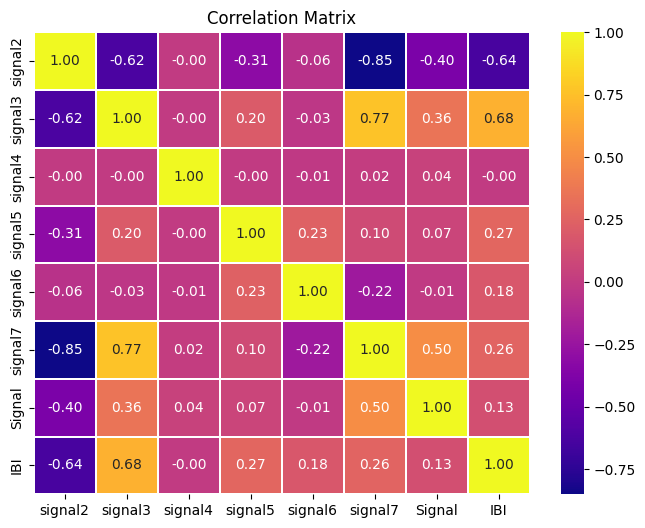

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = data1.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="plasma", fmt=".2f", linewidths=0.3)
plt.title('Correlation Matrix')
plt.show()


In [155]:
null_values = data1.isnull().sum()

In [156]:
data2=data1.dropna()

In [157]:
data2

,signal1,signal2,signal3,signal4,signal5,signal6,signal7,Signal,IBI
0,1970-01-01 00:00:32,32.0,32.0,64.00,4.000000,1.00,26.984375,0.687500,4.00
1,1969-12-31 23:59:30,33.0,46.0,-0.00,0.000000,85.00,27.671875,0.687500,31.91
2,1969-12-31 23:59:30,33.0,46.0,-0.00,0.164001,71.50,28.328125,0.656250,31.91
3,1969-12-31 23:59:30,34.0,46.0,-0.00,0.199876,75.33,28.984375,0.656250,31.91
4,1969-12-31 23:59:30,33.0,46.0,-0.00,0.199876,71.50,29.843750,0.859375,31.91
...,...,...,...,...,...,...,...,...,...
1135,1969-12-31 23:59:40,-3.0,60.0,-46.67,0.247282,73.55,3009.500000,0.921875,32.43
1136,1969-12-31 23:59:39,-3.0,60.0,-44.56,0.247282,73.98,3010.328125,0.828125,32.43
1137,1969-12-31 23:59:40,-3.0,60.0,-42.42,0.248563,74.50,3011.109375,0.781250,32.43
1138,1969-12-31 23:59:40,-3.0,60.0,-40.18,0.247282,75.03,3011.890625,0.781250,32.43


# Exploration and Analysis

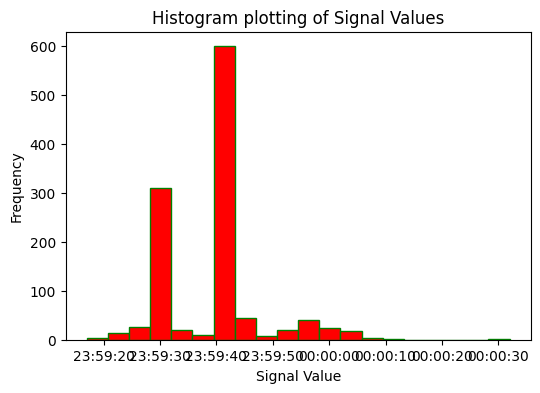

In [158]:
import matplotlib.pyplot as plt

# Create a histogram from the values of the "Signal"

plt.figure(figsize=(6, 4))
plt.hist(data2["signal1"], bins=20, color='red', edgecolor='green')
plt.xlabel('Signal Value')
plt.ylabel('Frequency')
plt.title('Histogram plotting of Signal Values')
plt.show()

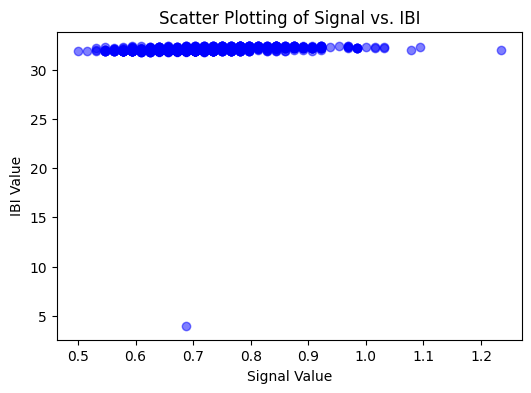

In [159]:
# Create a scatter plot of 'Signal' vs. 'IBI'
plt.figure(figsize=(6, 4))
plt.scatter(data2["Signal"], data2["IBI"], color='blue', alpha=0.5)
plt.xlabel('Signal Value')
plt.ylabel('IBI Value')
plt.title('Scatter Plotting of Signal vs. IBI')
plt.show()


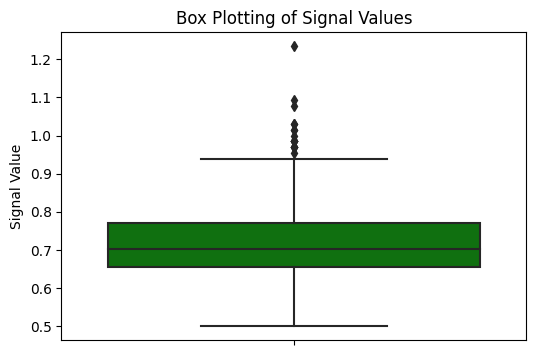

In [160]:
import seaborn as sns

# Create a box plot of 'Signal' values
plt.figure(figsize=(6, 4))
sns.boxplot(data=data2, y="Signal", color='green')
plt.ylabel('Signal Value')
plt.title('Box Plotting of Signal Values')
plt.show()



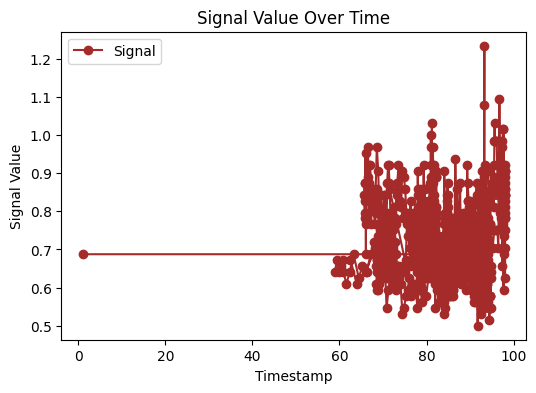

In [161]:

# Let's explore the data by visualizing the signals over time
plt.figure(figsize=(6, 4))
plt.plot(data2["signal6"], data2["Signal"], marker='o', linestyle='-', color='brown', label='Signal')
plt.xlabel('Timestamp')
plt.ylabel('Signal Value')
plt.title('Signal Value Over Time')
plt.legend()
plt.show()


In [162]:
#Statistics Table
summary_stats = data2.describe()
summary_stats = summary_stats.transpose()
summary_stats = summary_stats[["mean", "std", "min", "25%", "50%", "75%", "max"]]
print(summary_stats)

                mean         std         min         25%          50%  \
signal2    10.808772   16.153193   -6.000000   -2.000000     0.000000   
signal3    55.745614    7.441562   32.000000   46.000000    60.000000   
signal4     0.753412   94.926014 -549.960000  -14.685000    -0.000000   
signal5     0.217301    0.115328    0.000000    0.198594     0.206282   
signal6    84.664395    8.671827    1.000000   79.860000    85.510000   
signal7  1462.060225  953.826986   26.984375  556.308594  1484.367188   
Signal      0.715817    0.094345    0.500000    0.656250     0.703125   
IBI        32.053553    0.852082    4.000000   31.890000    32.050000   

                 75%          max  
signal2    33.000000    39.000000  
signal3    61.000000    68.000000  
signal4    22.002500   277.410000  
signal5     0.229344     4.000000  
signal6    91.970000    98.070000  
signal7  2266.492188  3012.687500  
Signal      0.769531     1.234375  
IBI        32.250000    32.430000  


In [163]:
#Signal Distribution as Stress Level Table
signal_stress_table = data2.groupby('signal1')['Signal'].describe()
print(signal_stress_table)


                     count      mean       std       min       25%       50%  \
signal1                                                                        
1969-12-31 23:59:17    2.0  0.734375  0.022097  0.718750  0.726562  0.734375   
1969-12-31 23:59:20    1.0  0.718750       NaN  0.718750  0.718750  0.718750   
1969-12-31 23:59:21    3.0  0.781250  0.056337  0.718750  0.757812  0.796875   
1969-12-31 23:59:22    1.0  0.906250       NaN  0.906250  0.906250  0.906250   
1969-12-31 23:59:23    4.0  0.703125  0.033754  0.656250  0.691406  0.710938   
1969-12-31 23:59:24    6.0  0.739583  0.117621  0.578125  0.656250  0.757812   
1969-12-31 23:59:25    2.0  0.703125  0.088388  0.640625  0.671875  0.703125   
1969-12-31 23:59:26    3.0  0.713542  0.117274  0.578125  0.679688  0.781250   
1969-12-31 23:59:27    5.0  0.637500  0.120221  0.546875  0.578125  0.578125   
1969-12-31 23:59:28   17.0  0.617647  0.050967  0.546875  0.578125  0.609375   
1969-12-31 23:59:29   65.0  0.640865  0.

# Model Immplementations

# RandomForest classification model

In [164]:
data2= data2.drop('signal1', axis=1)

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target (y)
X = data2.drop('IBI',axis=1)  # Features
y = data2['IBI']  # Target

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.02


<Figure size 1000x600 with 0 Axes>

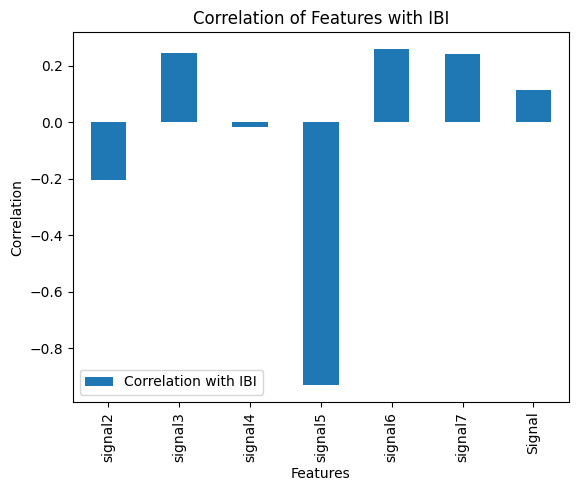

In [168]:
# Calculate the correlation between features and target 'IBI'
correlations = X_train.corrwith(y_train)
# Create a DataFrame to store correlations
correlation_df = pd.DataFrame({'Correlation with IBI': correlations})

# Plot the correlation matrix using a bar plot
plt.figure(figsize=(10, 6))
correlation_df.plot(kind='bar')
plt.title('Correlation of Features with IBI')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()